# **Image Processing and Analysis using OpenCV**

Image Processing refers to the manipulation and analysis of digital images using computational techniques. A digital image can be represented as a two-dimensional matrix of pixel intensity values, where each pixel carries information related to brightness or color. By performing operations directly on these pixel values, meaningful information can be extracted or visual transformations can be applied.

This project focuses on implementing fundamental image processing operations using Python and the OpenCV library. The aim is to understand how images are read, transformed, analyzed, and segmented at the pixel level using basic techniques.

### **Objective**

**The objectives of this project are to:**

* Understand how digital images are represented as pixel matrices

* Perform basic image transformations such as rotation and flipping

* Convert color images into grayscale images

* Analyze image properties including size, channels, and total pixels

* Detect edges and prominent regions in images

* Apply different image segmentation techniques

### **SOFTWARE AND TOOLS USED**

* Programming Language: Python

* Libraries: OpenCV, Matplotlib, NumPy

* Development Environment: Google Colab / Jupyter Notebook

* Operating System: Platform independent

### **METHODOLOGY**

The project follows a step-by-step approach where an image is first loaded and visualized. Various image processing operations are then applied sequentially. Each step is visualized to understand its effect on the image.

##### **Installing Required Libraries**

In [1]:
!pip install opencv-python matplotlib


##### **Importing Required Libraries**

In [3]:
import cv2
import os
import datetime
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import display
from PIL import Image

##### **Step 1: Uploading the Image**

In [6]:
print("Upload your image file:")
uploaded = files.upload()

image_filename = list(uploaded.keys())[0]
print(f"Using image: {image_filename}")


Upload your image file:


Saving image.jpg to image.jpg
Using image: image.jpg


##### **Utility Function: Displaying Images**

In [7]:
def show_cv(title, img_bgr):
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()

##### **Reading and Displaying the Original Image**

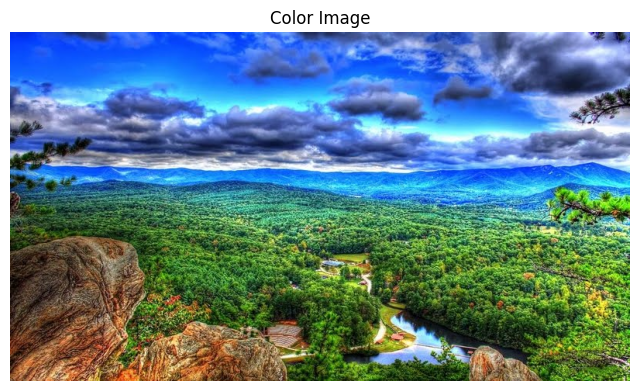

In [8]:
img = cv2.imread(image_filename)
if img is None:
    raise FileNotFoundError(f"Failed to load {image_filename}")

show_cv("Color Image", img)

##### **Step 2: Converting Image to Grayscale**

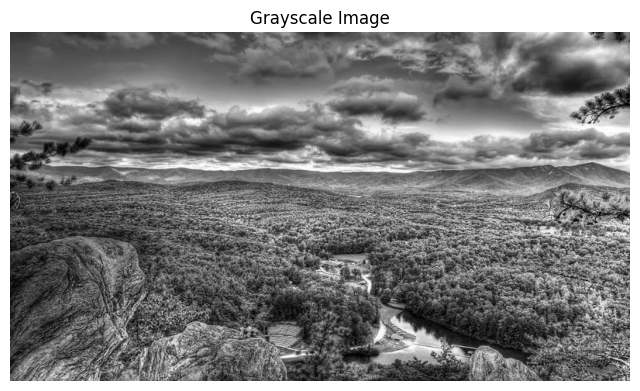

In [9]:
bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8, 6))
plt.imshow(bw, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

##### **Step 3: Image Properties Analysis**

In [10]:
h, w_img = img.shape[:2]
channels = img.shape[2]
pixels = h * w_img
file_size_bytes = os.path.getsize(image_filename)
file_size_mb = file_size_bytes / (1024 * 1024)
ts = os.path.getmtime(image_filename)
date_modified = datetime.datetime.fromtimestamp(ts)

print("Image Properties")
print(f"Width: {w_img}")
print(f"Height: {h}")
print(f"Channels: {channels}")
print(f"Total Pixels: {pixels:,}")
print(f"File Size: {file_size_mb:.2f} MB")
print(f"Last Modified: {date_modified}")


Image Properties
Width: 800
Height: 450
Channels: 3
Total Pixels: 360,000
File Size: 0.11 MB
Last Modified: 2026-01-11 18:24:46.241282


##### **Step 4: Image Rotation**

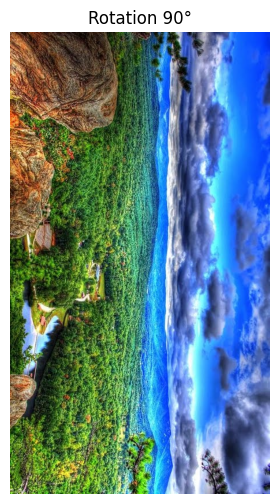

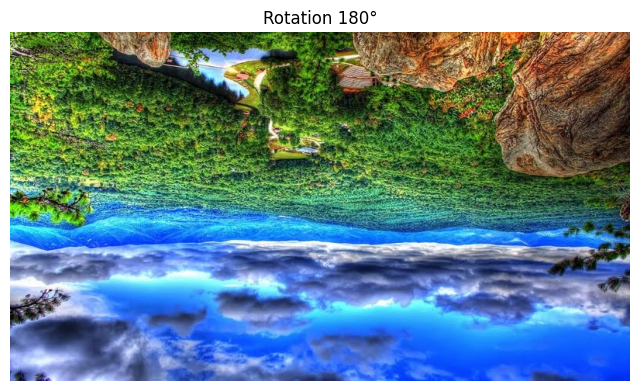

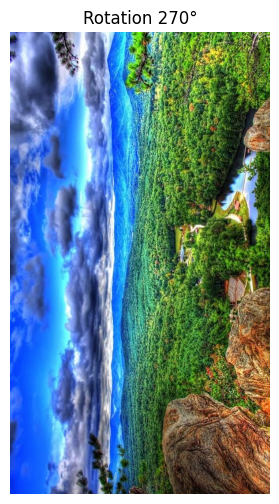

In [11]:
rot_90  = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
rot_180 = cv2.rotate(img, cv2.ROTATE_180)
rot_270 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

show_cv("Rotation 90°", rot_90)
show_cv("Rotation 180°", rot_180)
show_cv("Rotation 270°", rot_270)

##### **Step 5: Mirror Image (Horizontal Flip)**

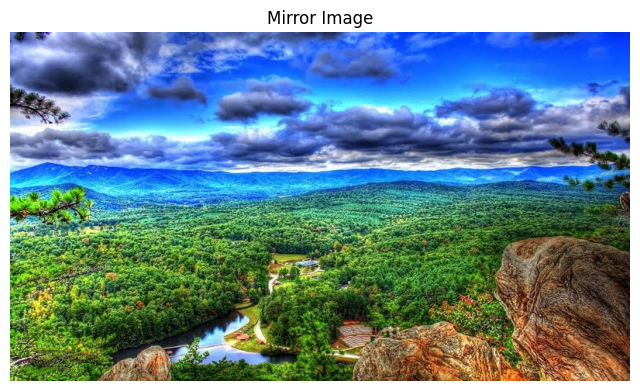

In [12]:
mirror = cv2.flip(img, 1)
show_cv("Mirror Image", mirror)

##### **Step 6:Object Dectection**

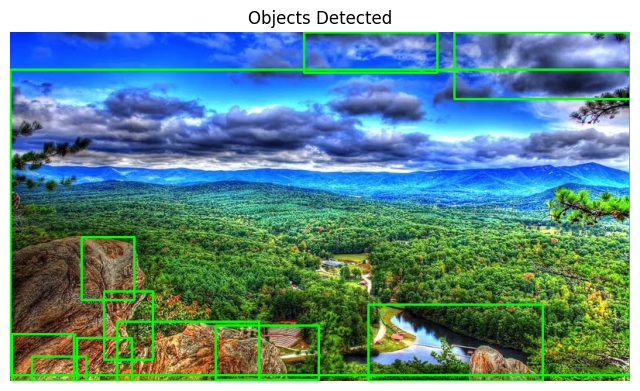

In [16]:
gray_for_obj = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(
    gray_for_obj, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

contours, _ = cv2.findContours(
    thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

obj_img = img.copy()

for c in contours:
    if cv2.contourArea(c) > 500:
        x, y, w_box, h_box = cv2.boundingRect(c)
        cv2.rectangle(
            obj_img, (x, y), (x + w_box, y + h_box), (0, 255, 0), 2
        )

show_cv("Objects Detected", obj_img)

##### **Step 6: Edge Detection using Canny Method**

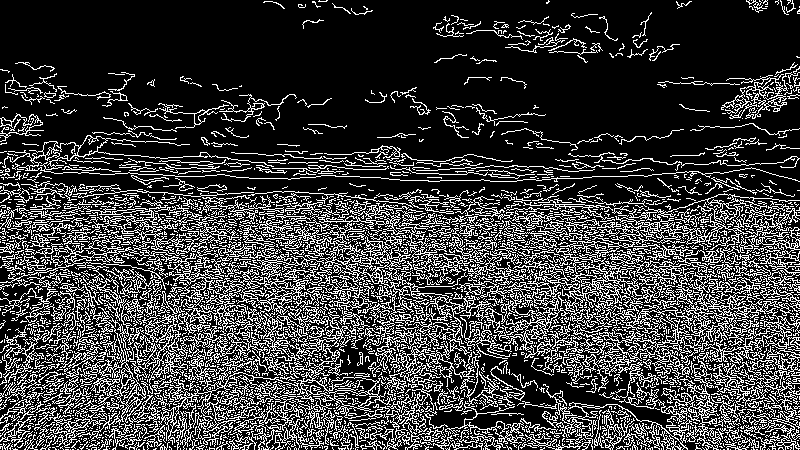

In [17]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 200)

edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
display(Image.fromarray(edges_rgb))


##### **Step 7: Image Segmentation**
Vertical Segmentation (80–20 and 90–10)

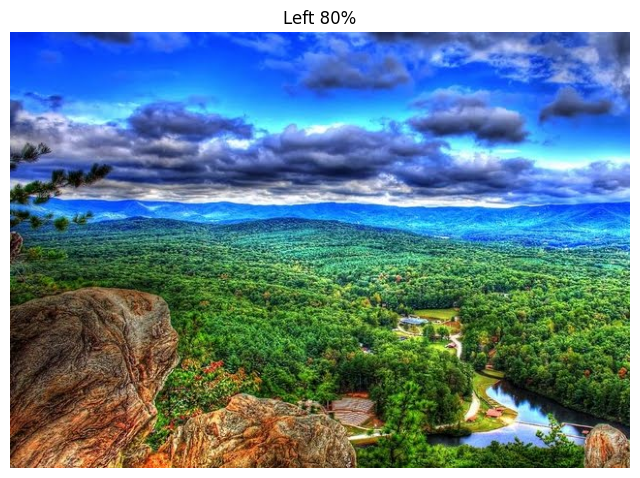

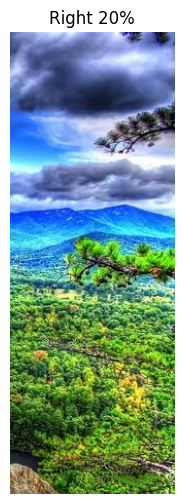

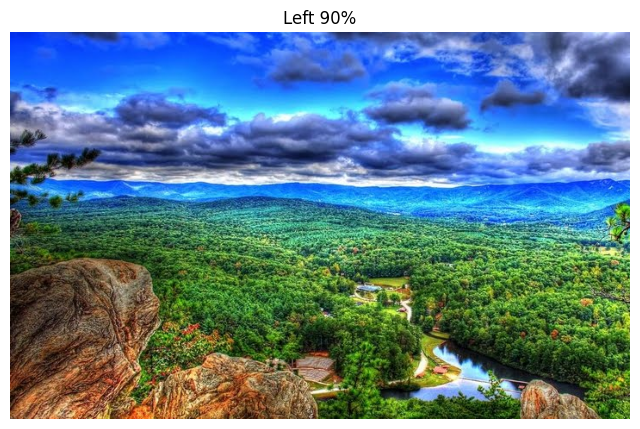

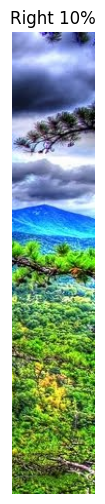

In [18]:
split_80 = int(0.8 * w_img)
split_90 = int(0.9 * w_img)

show_cv("Left 80%", img[:, :split_80])
show_cv("Right 20%", img[:, split_80:])
show_cv("Left 90%", img[:, :split_90])
show_cv("Right 10%", img[:, split_90:])


Horizontal Segmentation (70–30)

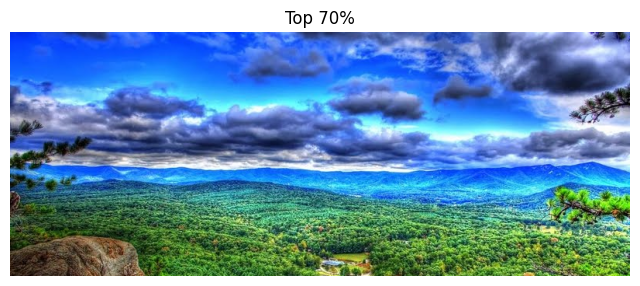

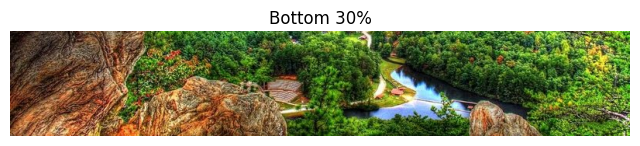

In [ ]:

split_h = int(0.7 * h)

top_70 = img[:split_h, :]
bottom_30 = img[split_h:, :]

show_cv("Top 70%", top_70)
show_cv("Bottom 30%", bottom_30)

##### **Step 8: Grid-Based Image Segmentation**

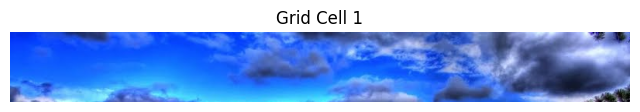

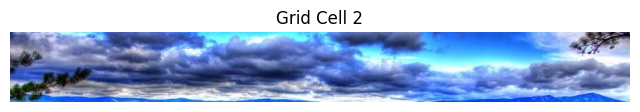

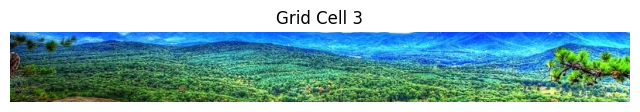

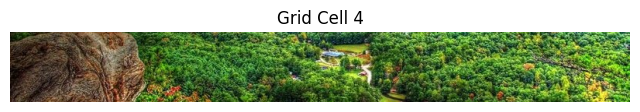

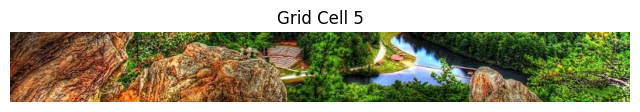

In [ ]:
prime_rows = 5
cell_height = h // prime_rows

for i in range(prime_rows):
    start_row = i * cell_height
    end_row = h if i == prime_rows - 1 else (i + 1) * cell_height
    cell = img[start_row:end_row, :]
    show_cv(f"Grid Cell {i+1}", cell)

### **RESULTS AND OBSERVATIONS**

* Grayscale conversion reduces computational complexity

* Rotation and flipping operations change the orientation without affecting pixel values

* Edge detection successfully highlights boundaries in the image

* Segmentation techniques divide the image into smaller regions for focused analysis

### **APPLICATIONS**

* Image enhancement

* Document image analysis

* Medical image preprocessing

* Surveillance image analysis

* Preprocessing for advanced image analysis systems

### **LIMITATIONS**

* Works on static images only

* Performance depends on image quality

* Does not handle real-time image processing

### **FUTURE SCOPE**

* Extension to real-time image processing

* Integration with advanced image analysis techniques

* Processing of video frames

* Automated region extraction

## **Conclusion**

This project demonstrates the practical implementation of fundamental image processing techniques using OpenCV. By working directly with pixel-level data, the project provides a clear understanding of how images can be analyzed, transformed, and segmented. The knowledge gained from this project forms a strong foundation for further exploration in advanced image analysis domains.
